# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, issue de données expérimentale mesurées par spectrométrie de masse, suit la loi de benford. Le fichier contient 12 expérince en colonne de l'abondance des protéines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import chisquare, power_divergence
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
import random

%load_ext autoreload
%autoreload 2

## loi de Benford

In [2]:
freq_benford = np.zeros(9, dtype=float)
for i in range(9):
    freq_benford[i] = (math.log((1+(1/(i+1))), 10))
print(freq_benford)
sum(freq_benford)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


0.9999999999999999

In [3]:
data = pd.read_csv("1512006-Calbicans-QUANTI_raw_abundance.csv", sep=",", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.325899e+04,2.765206e+04,6.973654e+04,6.309967e+04,2.252522e+04,5.307728e+04,9.088306e+04,2.035561e+04,0.000000e+00,0.000000e+00,1.021926e+05,1.794098e+05
1,5.042612e+07,1.592204e+07,4.388571e+07,1.824970e+07,1.596605e+07,1.566419e+07,2.563818e+07,2.666071e+07,1.431299e+07,2.617207e+07,2.847710e+07,4.051467e+07
2,0.000000e+00,0.000000e+00,6.015709e+03,2.413695e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.132027e+03,4.891291e+04,2.974154e+04,4.261914e+04
3,1.560630e+07,7.262593e+06,4.718013e+06,2.570901e+06,1.629196e+06,2.344451e+06,2.178284e+07,2.715498e+07,1.042588e+06,2.429717e+06,1.749820e+06,2.306792e+06
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.729096e+03,3.448312e+04


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03
mean,9.581614e+06,4.052261e+06,1.076837e+07,3.978163e+06,4.193656e+06,4.893936e+06,5.159211e+06,4.210483e+06,3.024618e+06,7.153360e+06,5.233013e+06,8.720928e+06
std,4.125241e+07,1.657254e+07,4.375361e+07,1.619806e+07,1.691781e+07,1.932079e+07,2.153755e+07,1.789246e+07,1.163298e+07,2.881443e+07,2.162810e+07,3.816761e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.296491e+04,3.506632e+04,1.029519e+05,4.253416e+04,3.999578e+04,4.841961e+04,3.683583e+04,1.386838e+04,3.081028e+04,6.278149e+04,4.784145e+04,6.436681e+04
50%,5.528054e+05,2.330474e+05,6.421764e+05,2.474077e+05,2.635641e+05,3.213512e+05,2.800026e+05,1.677515e+05,2.009571e+05,4.372223e+05,2.972878e+05,4.575889e+05
75%,2.548738e+06,1.242274e+06,3.258557e+06,1.268807e+06,1.331303e+06,1.555117e+06,1.468795e+06,1.066523e+06,1.041927e+06,2.255124e+06,1.609874e+06,2.565324e+06
max,8.084879e+08,3.745571e+08,8.851789e+08,3.320042e+08,3.169179e+08,3.253303e+08,5.001720e+08,3.281611e+08,1.973859e+08,5.360345e+08,3.759082e+08,7.139125e+08


In [5]:
data[data[0] > 20_000_000].shape

(191, 12)

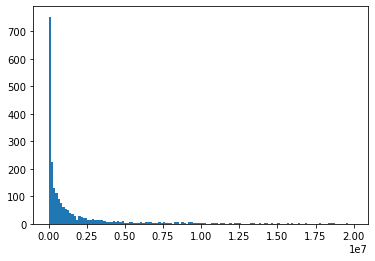

In [6]:
plt.hist(data[0], bins=range(0, 20_000_000, 150_000));

## First digit

In [7]:
first_digit = np.zeros(9, dtype=int)
for a in range(0, data.shape[1]):
    for x in data[a]:
        first = int(str(x)[0])
        if first == 0:
            continue
        first_digit[first-1] += 1
print(first_digit)
print(sum(first_digit))

[7942 4691 3273 2642 2176 1885 1638 1390 1282]
26919


### Normalisation

In [8]:
first_digit_norm = np.array(first_digit /  sum(first_digit))
print(first_digit_norm)
print(sum(first_digit_norm))
print(first_digit)

[0.29503325 0.17426353 0.12158698 0.09814629 0.0808351  0.07002489
 0.06084921 0.05163639 0.04762435]
1.0
[7942 4691 3273 2642 2176 1885 1638 1390 1282]


In [9]:
type(first_digit_norm)

numpy.ndarray

## Barplot de la fréquence des first digit de l'abondance des protéines et de la loi de Benford

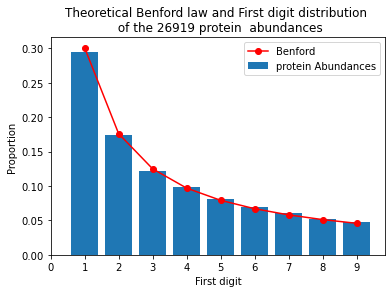

In [10]:
plt.plot(range(1,10), freq_benford, marker="o", color="red")
plt.bar(range(1,10), first_digit_norm)
plt.xticks(ticks=range(0,10))
plt.title(label=f"Theoretical Benford law and First digit distribution \n of the {sum(first_digit)} protein  abundances")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.legend(labels = ("Benford", "protein Abundances"));

## tests statistiques

In [11]:
first_digit_theo = np.array(freq_benford * sum(first_digit))
print(first_digit_theo)

[8103.42645328 4740.20060252 3363.22585076 2608.72064016 2131.47996236
 1802.14063007 1561.08522069 1376.97475176 1231.7458884 ]


In [12]:
type(first_digit_theo)

numpy.ndarray

In [13]:
print(sum(first_digit))
print(sum(first_digit_theo))

26919
26918.999999999993


### Test du $\chi^2$

In [14]:
chisquare(first_digit, first_digit_theo)

Power_divergenceResult(statistic=17.274209428053247, pvalue=0.027377095106173994)

In [16]:
power_divergence(first_digit, first_digit_theo, lambda_=0)

Power_divergenceResult(statistic=17.16574732677782, pvalue=0.02842870395537781)

In [18]:
first_digit

array([7942, 4691, 3273, 2642, 2176, 1885, 1638, 1390, 1282])

In [27]:
first_digit_theo

array([8103.42645328, 4740.20060252, 3363.22585076, 2608.72064016,
       2131.47996236, 1802.14063007, 1561.08522069, 1376.97475176,
       1231.7458884 ])

In [ ]:
[7932 4679 3266 2636 2172 1881 1635 1387 1282]
[8103.42645328 4740.20060252 3363.22585076 2608.72064016 2131.47996236
 1802.14063007 1561.08522069 1376.97475176 1231.7458884 ]

In [22]:
power_divergence([7942, 4691, 3273, 2642, 2176, 1885, 1638, 1390, 1282], 
                 [8103.42645328, 4740.20060252, 3363.22585076, 2608.72064016, 
                  2131.47996236, 1802.14063007, 1561.08522069, 1376.97475176,
                  1231.7458884], lambda_=0)

Power_divergenceResult(statistic=17.16574732697711, pvalue=0.02842870395341126)

#### $2^{eme}$ méthode

In [15]:
test = np.array([list(first_digit), list(first_digit_theo)], dtype=float)
print(test)

[[7942.         4691.         3273.         2642.         2176.
  1885.         1638.         1390.         1282.        ]
 [8103.42645328 4740.20060252 3363.22585076 2608.72064016 2131.47996236
  1802.14063007 1561.08522069 1376.97475176 1231.7458884 ]]


In [16]:
chi2_contingency(test)

(8.555768540906564,
 0.3811435890854216,
 8,
 array([[8022.71322664, 4715.60030126, 3318.11292538, 2625.36032008,
         2153.73998118, 1843.57031503, 1599.54261035, 1383.48737588,
         1256.8729442 ],
        [8022.71322664, 4715.60030126, 3318.11292538, 2625.36032008,
         2153.73998118, 1843.57031503, 1599.54261035, 1383.48737588,
         1256.8729442 ]]))

## Test KS (ks_2samp)

In [17]:
ks_2samp(first_digit, first_digit_theo)

KstestResult(statistic=0.1111111111111111, pvalue=1.0)

#### $2^{eme}$ méthode

In [18]:
KS_obs = []
for i in range(9):
    KS_obs += [i+1]*int(first_digit[i])
    
KS_theo = []
for i in range(9):
    KS_theo += [i+1]*int(first_digit_theo[i])
#print(KS_obs)
#print(KS_theo)
print(sum(KS_obs))
print(sum(KS_theo))

94025
92585


In [19]:
ks_2samp(KS_obs, KS_theo)

KstestResult(statistic=0.011234015792294105, pvalue=0.06645028870743053)

# Test réaliser pour étudier les tests statistique

### Test pour comprendre la fonction chisquare

##### hypothèse
On pose l'hypothèse :
- H0 : la distribution observé (a) suit la distribution théorique (b)  
- H1 : La distribution observé (a) ne suit pas la distribution théorique (b)  
    
Condition de validité du test :  
- les valeurs de la distribution théorique doivent ètre supérieur à 5.[1]  
    
    [1] C'est à cause de cette condition de validité du test que l'on ne peux¶ pas utilisé les valeur normalisé de la distribution observé par rapport à la loi théorique.  
    
Régle de décision du  test :  
- si la p-value < à $\alpha = 5\%$, alors le test est significatif et on rejette l'hypothèse H0.  
- si la p-value > à $\alpha = 5\%$, alors le test est non significatif et on ne rejette pas l'hypothèse H0.

In [20]:
a = [15, 18, 16, 14, 12, 12] # distribution observé
b = [16, 17, 15, 15, 11, 13] # distribution théorique
A = [ a[i]/sum(a) for i in range(0, len(a)) ] # normalisation de la distribution observé
B = [ b[i]/sum(b) for i in range(0, len(b)) ] # fréquence de la distribution théorique
print(A)
print(B)
chi1 = chisquare(a, f_exp=b)
chi2 = chisquare(A, f_exp=B)
print(f"{chi1}\n{chi2}")
print("\n")
print(f"La p-value est de : {chi1[1]} pour le test réaliser sur les distributions")
print("\n")
print(f"La p-value est de : {chi2[1]} pour le test réaliser sur les fréqunces")

[0.1724137931034483, 0.20689655172413793, 0.1839080459770115, 0.16091954022988506, 0.13793103448275862, 0.13793103448275862]
[0.1839080459770115, 0.19540229885057472, 0.1724137931034483, 0.1724137931034483, 0.12643678160919541, 0.14942528735632185]
Power_divergenceResult(statistic=0.4224890305772659, pvalue=0.9946874696728052)
Power_divergenceResult(statistic=0.004856195753761673, pvalue=0.999999912735802)


La p-value est de : 0.9946874696728052 pour le test réaliser sur les distributions


La p-value est de : 0.999999912735802 pour le test réaliser sur les fréqunces


### Conclusion pour l'utilisation de chisquare

On remarque une différence de p-value entre les deux tests. Il est préférable de réaliser les tests sur les distribution observé et théorique, plutôt que sur la distribution normaliseé et la fréquence de la loi théorique

## Test $\chi²$
### réaliser sur les fréquences

In [21]:
chi2 = chisquare([ first_digit_norm[key] for key in sorted(first_digit_norm) ],
                [ freq_benford[key] for key in sorted(freq_benford) ])
print(chi2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Réaliser sur les distribution observé et théorique
#### calcaul des effectifs théoriques par rapport à la loi de Benford

In [ ]:
first_digit_theo = [freq_benford[key]*somme for key in sorted(freq_benford)] # liste des effectifs théoriques
print(first_digit) # effectifs observé
print(first_digit_theo)
print(sum(list(first_digit.values())))
print(sum(first_digit_theo))

#### Test du $\chi²$

In [ ]:
chi2_final = chisquare([ first_digit[key] for key in sorted(first_digit) ], f_exp = first_digit_theo)
print(chi2_final)
p_val = chi2_final[1]
print(f"\nLa p-value est de : {chi2_final[1]}")

## Test de conformité à une loi théorique:
V.A. : nombre de first digit  

Hopothèse :  
    - H0 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain suit la loi de Benford.  
    - H1 : La distribution des $1^{er}$ digits de la taille des protéines du protéome Humain ne suit pas la loi de Benford.  
    
Conditionde validité : les effectifs calculés > 5  

Règle de décision (test $\chi²$):  
    -Si, $\chi²_{cal} > \chi²_{\alpha, (k-1)ddl}$, le test est significatif à $\alpha$% et on rejette H0.  
 
## détermination de $F_{theo}$ et $F_{obs}$

In [ ]:
# dictionnaire de la distribution théorique
first_digit_theo = {}
for key in first_digit:
    first_digit_theo[key] = freq_benford[key] * data.shape[0]

F_theo = [freq_benford[key]*data.shape[0] for key in sorted(freq_benford)]
print(f"Le dictionnaire de la distribution théorique des first digits est : {first_digit_theo}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs théoriques est : {F_theo}\n")

F_obs = [ first_digit[key] for key in sorted(first_digit) ]
print(f"Le dictionnaire de la distribution observé des first digits est : {first_digit}\n")
print(f"La liste triées par ordre croissant des first digits des valeurs observés est : {F_obs}\n")

## Test statistique de comparaison d'une distribution par rapport une une distribution de référence
Le test à réaliser est un test du $\chi^2$
### test du test du $\chi^2$ sur les fréquence

In [ ]:
chi2 = chisquare([ first_digit_norm[key] for key in sorted(first_digit_norm) ], [ freq_benford[key] for key in sorted(freq_benford) ])
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

Le test du $\chi^2$ sur les fréquence donne une p-value > 0.05, on ne rejette donc pas l'hypothèse $H_0$. Néanmoins, ce les condition de validité du test ne sont pas validé. En effet le test du $\chi^2$ ce réalise sur des distribution et non sur des fréquence. Ici, on obtient des valeurs théorique < 5, donc le test ne peut être réalisé. Il faut donc réaliser le test sur la distribution des $1^{er}$ digits.

### test du $\chi^2$ sur les distribution observé et théorique

In [ ]:
F_obs[0]

In [ ]:
ff = [ int(F_theo[i]) for i in range(len(F_theo))]
ff

In [ ]:
chi2 = chisquare([ first_digit_norm[key] for key in sorted(first_digit_norm) ], f_exp = F_theo)
print(chi2)
print(f"\nLa p-value est de  : {chi2[1]}\n")

# Conclusion
Test significatif, ne suit pas la loi de Benford.

# Test de Kolmogorov-Smirnof
### préparation pour le test KS

In [ ]:
KS_obs = []
for i in range(1, 10):
    KS_obs += [i]*int(first_digit_norm[i]*100)
    
KS_theo = []
for i in range(1, 10):
    KS_theo += [i]*int(freq_benford[i]*100)
print(KS_obs)
print(KS_theo)

In [ ]:
random.shuffle(KS_obs)
random.shuffle(KS_theo)
print(KS_obs)
print(KS_theo)

In [ ]:
ks_2samp(KS_obs, KS_theo)

## Test KS sur la distribution

In [ ]:
KS_obs = []
for i in range(1, 10):
    KS_obs += [i]*int(first_digit[i])
KS_theo = []
for i in range(1, 10):
    KS_theo += [i]*int(freq_benford[i]*somme)
print(len(KS_obs))
print(len(KS_theo))

In [ ]:
random.shuffle(KS_obs)
random.shuffle(KS_theo)
ks_2samp(KS_obs, KS_theo)